In [209]:
import pandas as pd 
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [210]:
df = pd.read_csv('Boston.csv')

In [211]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [212]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [213]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Correlación variables

<Axes: >

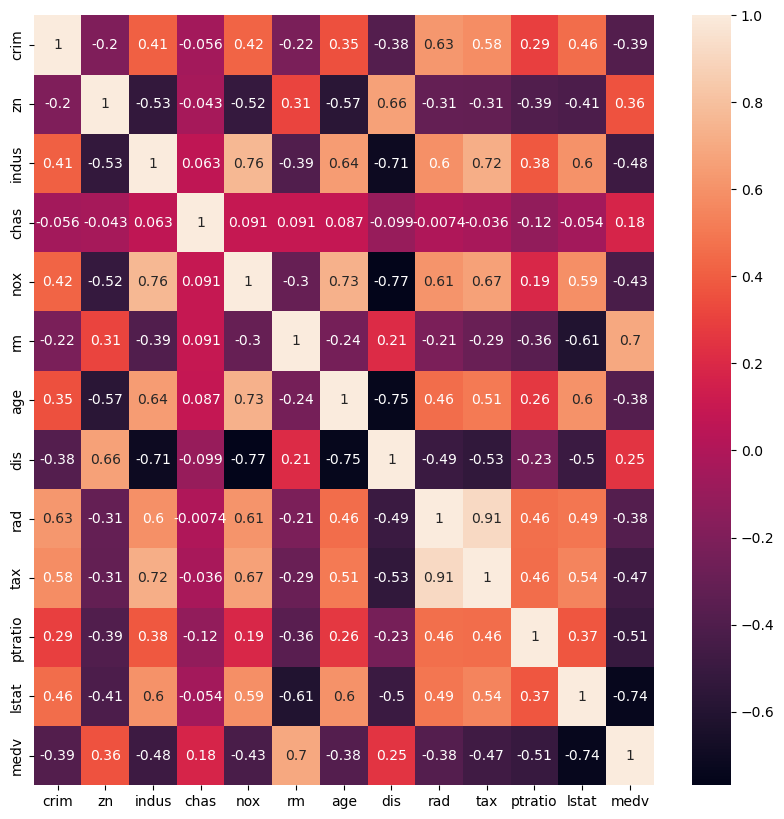

In [214]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [215]:
target = 'medv'
y = df[target]

In [216]:
df = pd.get_dummies(df,columns=['rad'])

In [217]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,0,0,1,0,0,0,0,0,0


In [218]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones':predicciones,
        'y':y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False)+1
    grouped = df_calibracion.groupby('bins').mean()

    plt.plot(grouped.predicciones, grouped.y, label="Modelo", marker="o")
    plt.plot(grouped.predicciones, grouped.predicciones, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("Prediccion")
    plt.ylabel("Real")

# Analisis Bivariado

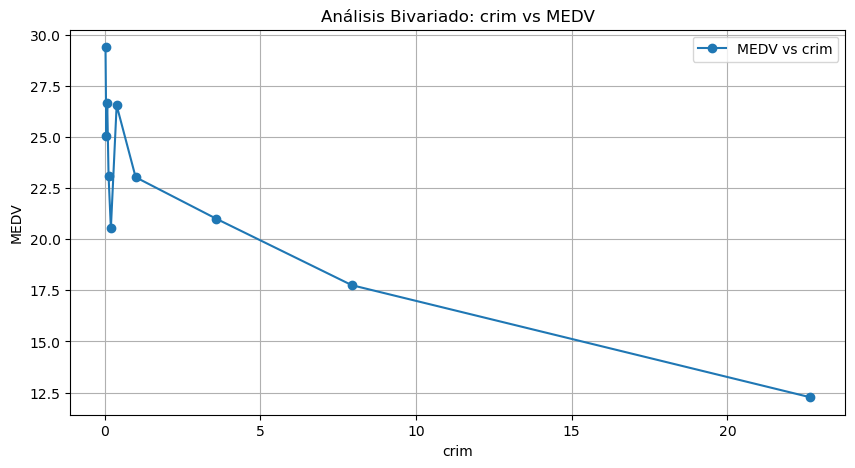

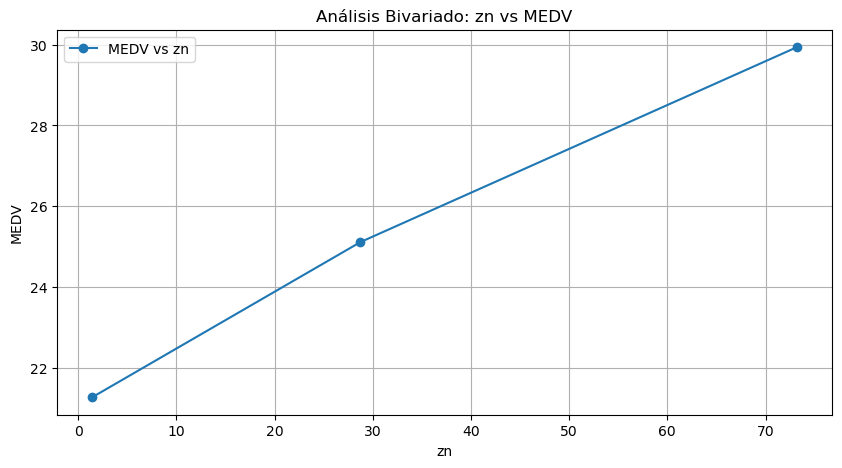

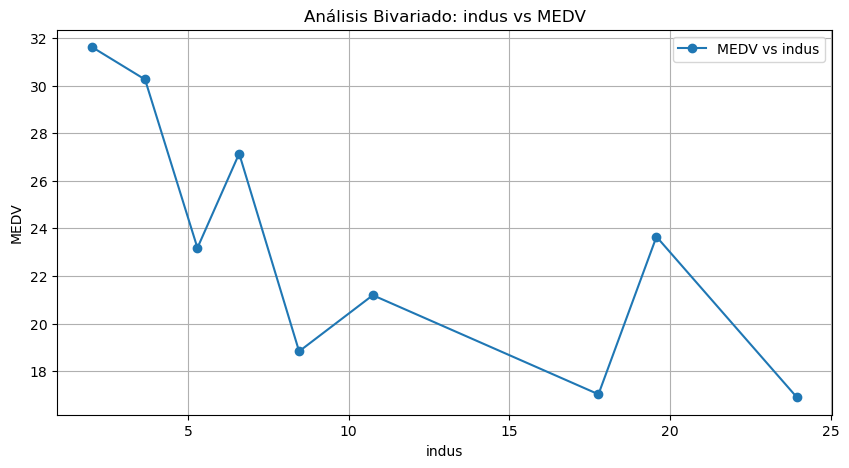

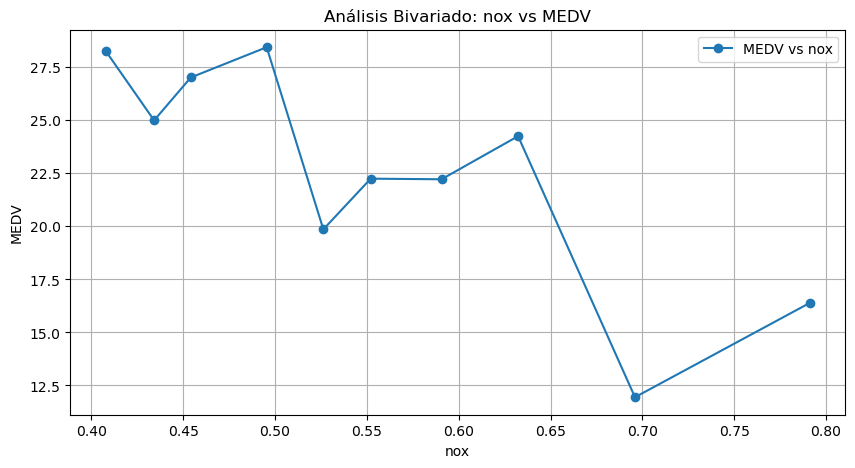

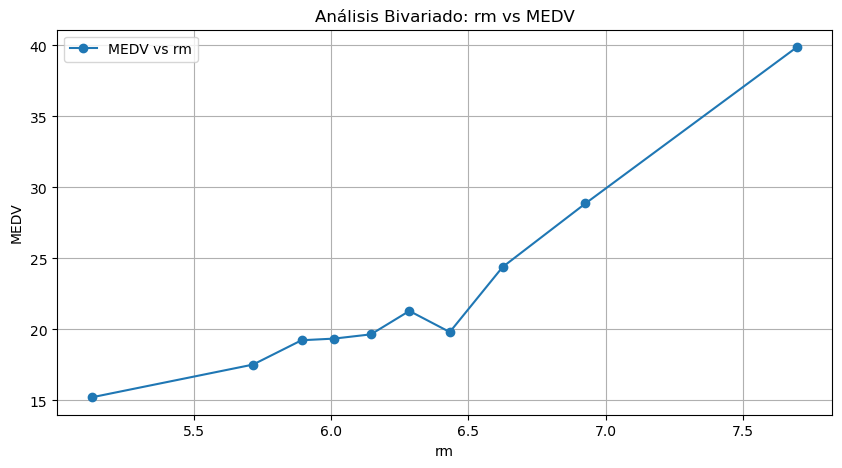

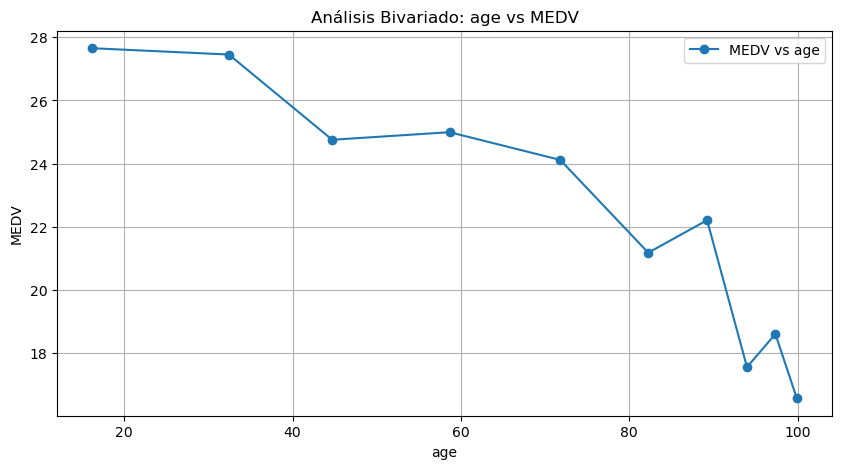

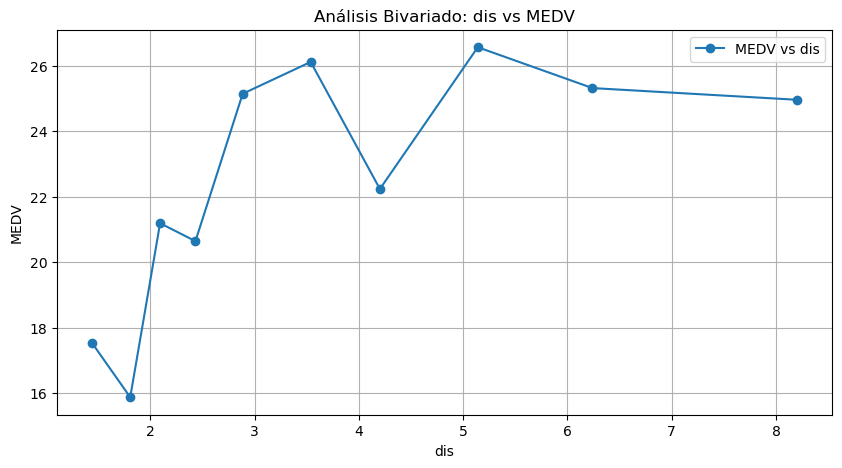

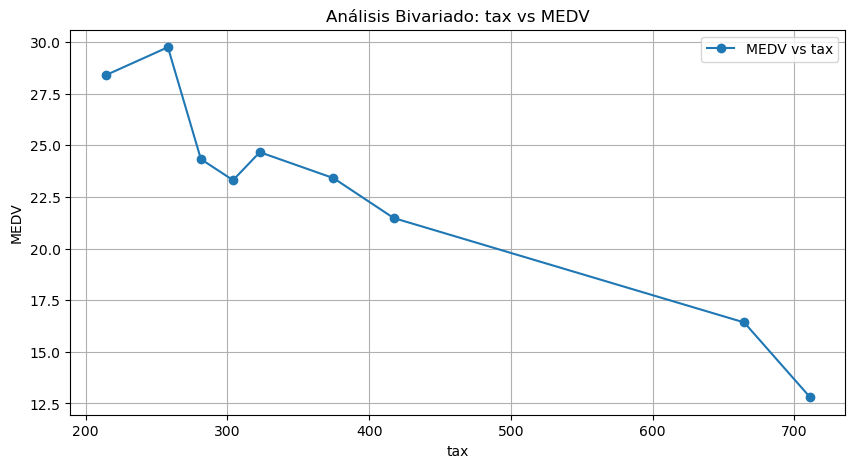

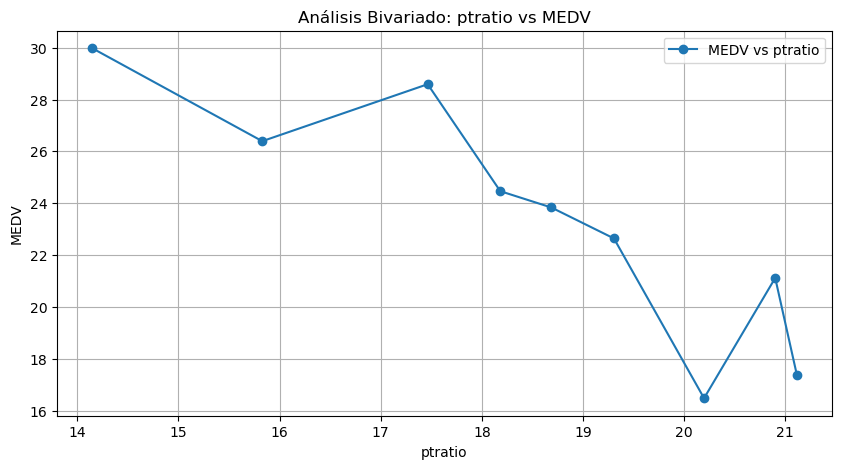

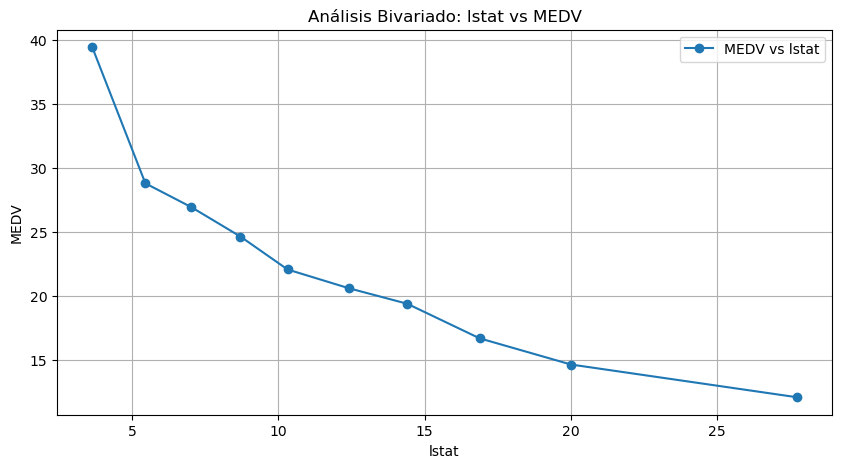

In [219]:
variables = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']

for i in variables:
    variable_bin = f'{i}_bin'
    df[variable_bin] = pd.qcut(df[i], q=10, labels=False, duplicates='drop') + 1
    grouped = df.groupby(variable_bin).mean()
    plt.figure(figsize=(10, 5))
    plt.plot(grouped[i].values, grouped[target].values, marker="o", label=f'MEDV vs {i}')
    plt.xlabel(i)
    plt.ylabel('MEDV')
    plt.title(f'Análisis Bivariado: {i} vs MEDV')
    plt.legend()
    plt.grid()
    plt.show()
    df.drop(columns=[variable_bin], inplace=True)




In [220]:

df.head()


,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,0,0,1,0,0,0,0,0,0


In [221]:
X = df.copy()
X = X.drop(target, axis=1)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,lstat,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,4.98,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,9.14,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,4.03,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,2.94,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,5.33,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,9.67,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,9.08,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,5.64,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,6.48,1,0,0,0,0,0,0,0,0


# RLM con todas las variables 

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state = 42)

model = linear_model.LinearRegression().fit(X_train, y_train)

predicciones_lineal=model.predict(X_test)
r2_score(y_pred = predicciones_lineal, y_true = y_test)

0.7211432830626586

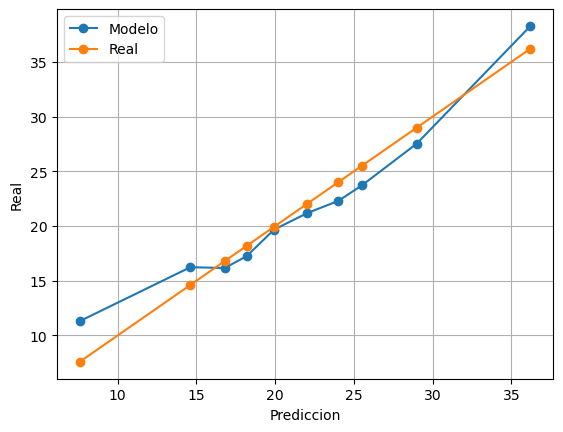

In [223]:
calibracion(predicciones_lineal, y_test, 10)

# Polinomial Grado 2 con todas las variables

In [224]:
degree = 2

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Ridge().fit(X_train, y_train)

 
predicciones_poly2= model.predict(X_test)
r2_score(y_pred=predicciones_poly2, y_true=y_test)

0.8121940246948016

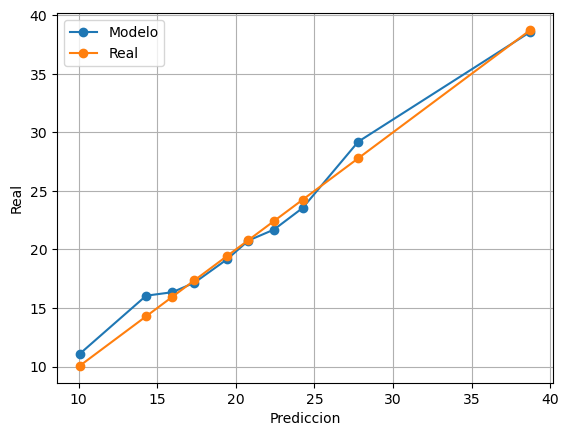

In [225]:
calibracion(predicciones_poly2, y_test, 10)

# Polinomial Grado 3 con todas las variables

In [226]:
degree = 3

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Lasso().fit(X_train, y_train)

 
predicciones_poly3= model.predict(X_test)
r2_score(y_pred=predicciones_poly3, y_true=y_test)

0.728675493313274

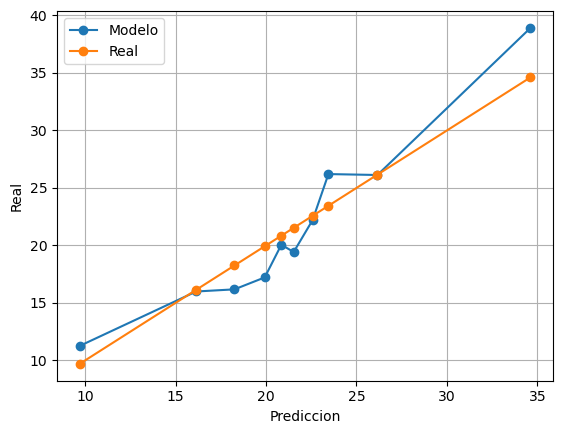

In [227]:
calibracion(predicciones_poly3, y_test, 10)

In [228]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,0,0,1,0,0,0,0,0,0


# Revisar la significancia de las variables

In [229]:
result = smf.ols('medv ~ ' + '+'.join(df.columns.drop(['medv', 'indus', 'age', 'rad_1', 'rad_6','rad_2'])), data=df).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,41.7323,5.082,8.212,0.000,31.747,51.718
crim,-0.1233,0.033,-3.769,0.000,-0.188,-0.059
zn,0.0533,0.014,3.816,0.000,0.026,0.081
chas,2.6619,0.863,3.085,0.002,0.967,4.357
nox,-18.3170,3.617,-5.064,0.000,-25.424,-11.210
rm,3.5311,0.412,8.565,0.000,2.721,4.341
dis,-1.6216,0.189,-8.561,0.000,-1.994,-1.249
tax,-0.0087,0.003,-2.534,0.012,-0.015,-0.002
ptratio,-0.9678,0.144,-6.709,0.000,-1.251,-0.684
lstat,-0.5488,0.047,-11.618,0.000,-0.642,-0.456


In [230]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,0,0,1,0,0,0,0,0,0


In [231]:
X_multiple = df[['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'tax', 'ptratio', 'lstat', 'rad_3', 'rad_4', 'rad_5', 'rad_7', 'rad_8', 'rad_24']]

In [232]:
scaler = StandardScaler().fit(X_multiple)
X_scaled = scaler.transform(X_multiple)

# RLM con las variables significantes

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state = 42)

model = linear_model.Ridge().fit(X_train, y_train)

predicciones_lineal=model.predict(X_test)
r2_score(y_pred = predicciones_lineal, y_true = y_test)

0.7238173788011175

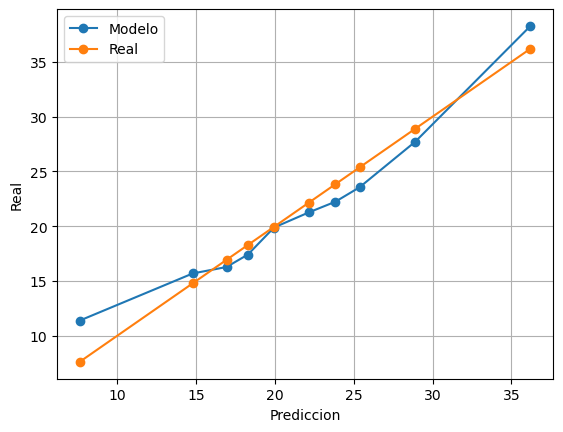

In [234]:
calibracion(predicciones_lineal, y_test, 10)

# Polinomial Grado 2 con las variables significantes

In [235]:
degree = 2

scaler = StandardScaler().fit(X_multiple)
X_scaled = scaler.transform(X_multiple)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Ridge().fit(X_train, y_train)

 
predicciones_poly2= model.predict(X_test)
r2_score(y_pred=predicciones_poly2, y_true=y_test)

0.8107558114121767

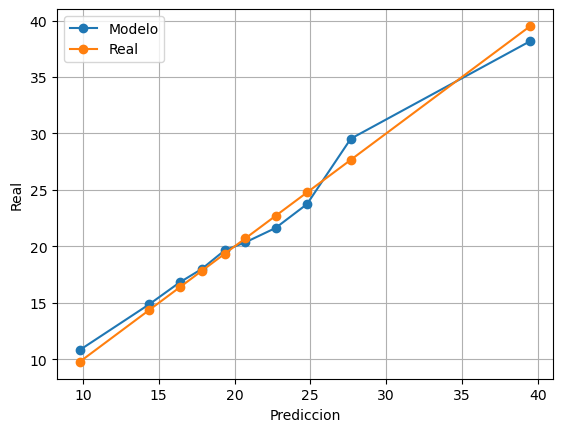

In [236]:
calibracion(predicciones_poly2, y_test, 10)

# Polinomial Grado 3 con las variables significantes

In [237]:
degree = 3

scaler = StandardScaler().fit(X_multiple)
X_scaled = scaler.transform(X_multiple)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Lasso().fit(X_train, y_train)

 
predicciones_poly3= model.predict(X_test)
r2_score(y_pred=predicciones_poly3, y_true=y_test)

0.7688308046927307

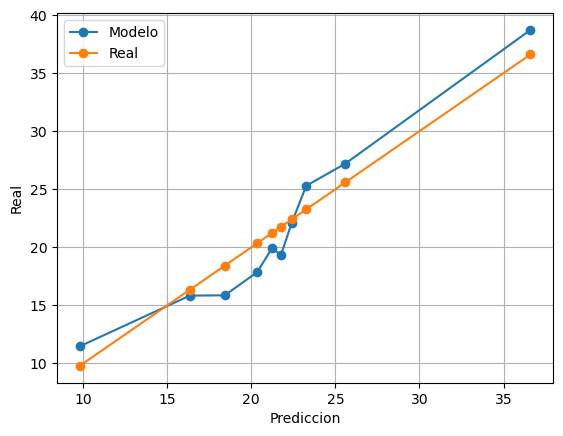

In [238]:
calibracion(predicciones_poly3, y_test, 10)

# Feature Eng

In [239]:
X = df.copy().drop(target, axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,lstat,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,4.98,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,9.14,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,4.03,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,2.94,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,5.33,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,9.67,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,9.08,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,5.64,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,6.48,1,0,0,0,0,0,0,0,0


In [240]:
X['tax_per_indus'] = X['tax'] / X['indus']
X['nox_per_indus'] = X['nox'] / X['indus']
X['tax_per_nox'] = X['tax'] / X['nox']
X['age_per_nox'] = X['age'] / X['nox']
X['age_per_indus'] = X['age'] / X['indus']
X['zn_per_dis'] = X['zn'] / X['dis'] 



In [241]:
X['lstat']=np.log(X['lstat'])
X['age'] = np.log(X['age'])
X['ptratio'] = np.log(X['ptratio'])

In [242]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = linear_model.LinearRegression().fit(X_train, y_train)

predicciones_lineal = model.predict(X_test)
r2_score(y_true=y_test, y_pred=predicciones_lineal2)

0.7439603787830683

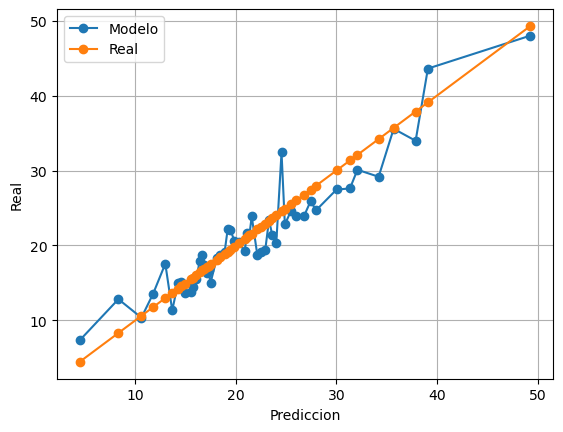

In [243]:
calibracion(predicciones_lineal, y_test, 50)


In [244]:
degree = 2

# Aplicar StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

#Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly2_fe= model.predict(X_test)
r2_score(y_pred=predicciones_poly2_fe, y_true=y_test)

0.7627830194691901

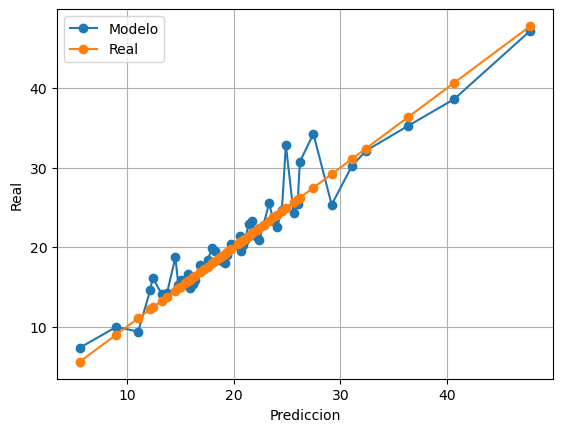

In [245]:
calibracion(predicciones_poly2_fe, y_test, bins=50)

In [246]:

degree = 3

# Aplicar StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

#Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly3_fe= model.predict(X_test)
r2_score(y_pred=predicciones_poly3_fe, y_true=y_test)

0.751125427396313

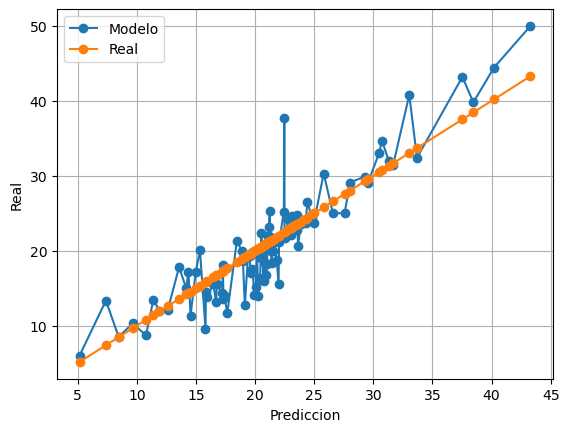

In [247]:
calibracion(predicciones_poly3_fe, y_test, bins=100)